In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import copy
# display plots in this notebook
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (10, 10) 

# Make sure that caffe is on the python path:
caffe_root = ''  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

In [2]:
# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE = 'models/deep_mammo/alex_dropout_0_5_deploy.prototxt'
WEIGHTS_FILE = '/mnt/weights/pretrained.2844_iter.alex_reg_0_005_0_5_dropout.caffemodel'
IMAGE_FILE = '/mnt/2x_augmented_train/P_00737_LEFT_CC_1_0_0.tif'
MEAN_FILE = '/home/ubuntu/2x_padding_224x224_dataset/mass_2x_padding_dataset_train_mean.binaryproto'

caffe.set_mode_cpu()

In [3]:
def get_mean_image():
    mean_blobproto_new = caffe.proto.caffe_pb2.BlobProto()
    f = open(MEAN_FILE, 'rb')
    mean_blobproto_new.ParseFromString(f.read())
    mean_image = caffe.io.blobproto_to_array(mean_blobproto_new)
    f.close()
    return mean_image

(10, 3, 224, 224)


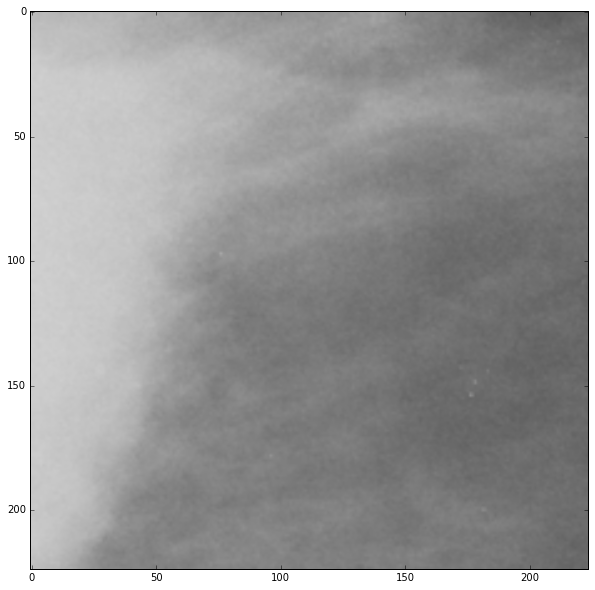

In [4]:
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)
mean_image = get_mean_image()[0]
# input_image = np.expand_dims(np.transpose(input_image, (2, 0, 1)), axis=0)
input_image = np.transpose(input_image, (2, 0, 1))

caffeLabel = np.zeros((10,2))
caffeLabel[:, 1] = 1;
net = caffe.Net(MODEL_FILE, WEIGHTS_FILE, caffe.TEST)
out = net.forward_all(data=np.asarray([input_image]) - mean_image)
bw = net.backward(**{net.outputs[0]: caffeLabel})
diff = bw['data']
print diff.shape

In [5]:
print net.blobs['prob'].data.shape

(10, 2)


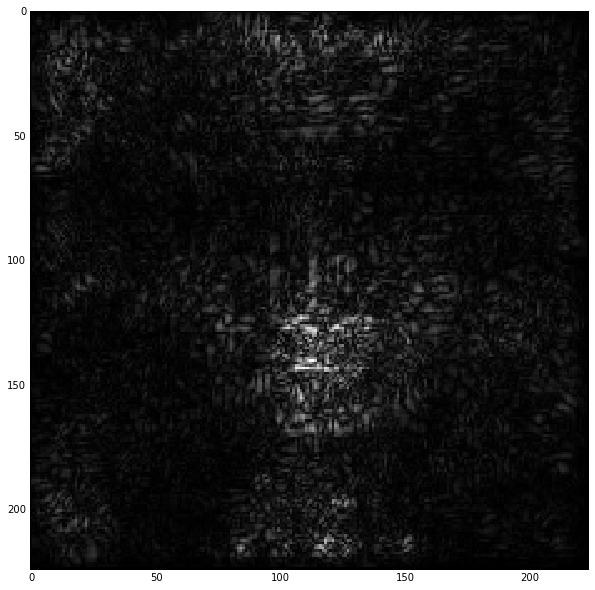

In [9]:
saliency = np.amax(np.abs(diff), axis=1)
plt.imshow(saliency[0])